In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

# Naive Bayes

In [6]:
# Load data.
data = load_iris()

In [3]:
# Display the description.
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Explanatory variables.
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [73]:
# Response variable.
Y = data['target']
labels = list(data['target_names'])
print(labels)

['setosa', 'versicolor', 'virginica']


visualize the frequency table  of the labels using barplot

In [17]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

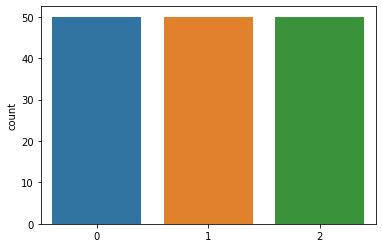

In [19]:
sns.countplot(x='target',data=data)


plot a pairplot of your dataset , and use the class values in hue to label your scatter points

In [31]:
data.target==

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

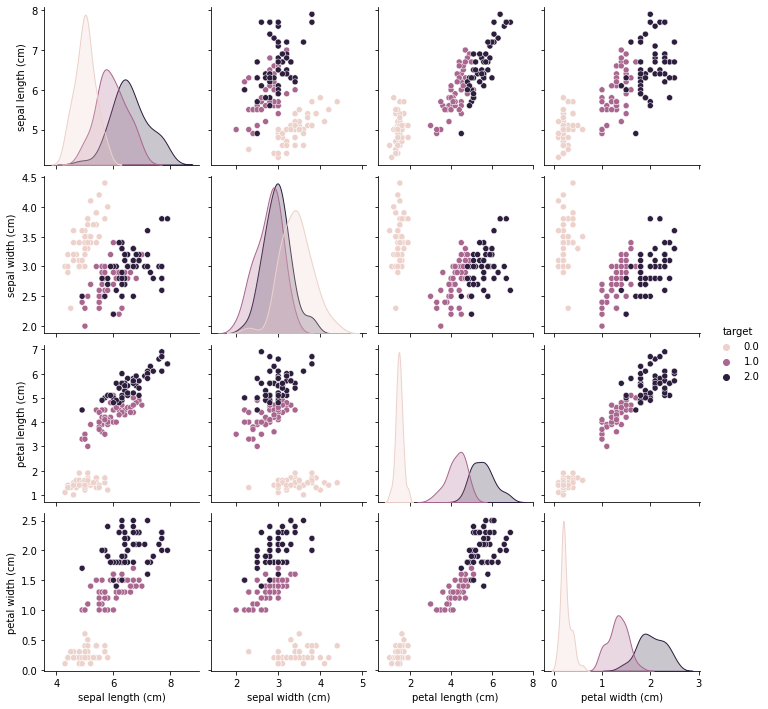

In [39]:
sns.pairplot(data1,hue='target')

split your dataset to train and test set  **(set test_size to 30% )**

In [ ]:
# Split the dataset into training and testing.


In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,Y)
x_train,x_test,y_train,y_test

(array([[5.7, 2.8, 4.5, 1.3],
        [5.1, 3.5, 1.4, 0.2],
        [5.7, 3.8, 1.7, 0.3],
        [4.7, 3.2, 1.3, 0.2],
        [6.8, 3.2, 5.9, 2.3],
        [5. , 3.3, 1.4, 0.2],
        [6.1, 2.8, 4. , 1.3],
        [5.8, 2.6, 4. , 1.2],
        [4.4, 3.2, 1.3, 0.2],
        [4.8, 3. , 1.4, 0.3],
        [5.8, 2.7, 3.9, 1.2],
        [6.1, 2.8, 4.7, 1.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.9, 3. , 4.2, 1.5],
        [6. , 2.2, 5. , 1.5],
        [4.9, 2.5, 4.5, 1.7],
        [5.1, 2.5, 3. , 1.1],
        [7.7, 3.8, 6.7, 2.2],
        [5.9, 3. , 5.1, 1.8],
        [5.2, 4.1, 1.5, 0.1],
        [7.3, 2.9, 6.3, 1.8],
        [4.9, 2.4, 3.3, 1. ],
        [6.4, 2.7, 5.3, 1.9],
        [6.3, 3.3, 6. , 2.5],
        [5.5, 3.5, 1.3, 0.2],
        [5. , 2. , 3.5, 1. ],
        [4.5, 2.3, 1.3, 0.3],
        [6.9, 3.1, 5.4, 2.1],
        [6.3, 2.7, 4.9, 1.8],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.4, 1.7, 0.2],
        [6. , 2.9, 4.5, 1.5],
        [5.8, 2.7, 5.1, 1.9],
        [5

fit a GaussianNB on train set and make prediction on testset

In [42]:
# Train and predict.
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
y_pred=clf.predict(x_test)

use the previous result and plot the confusion matrix

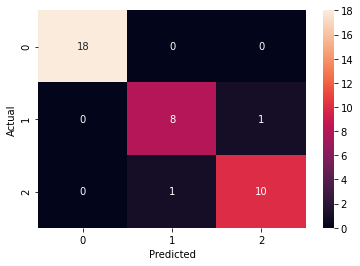

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

calculate the accuracy using sklearn

In [45]:
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

visualize the parameters of the GuassianNB after training , store theta in ``centers`` and sigma in ``variances``  

In [49]:
centers=clf.theta_
variances=clf.sigma_
variances

array([[0.12139649, 0.16246094, 0.02652344, 0.01311524],
       [0.24604402, 0.10492564, 0.19976205, 0.03995241],
       [0.43460881, 0.10249836, 0.33113741, 0.07780408]])

complete this code to reproduce the plot below 

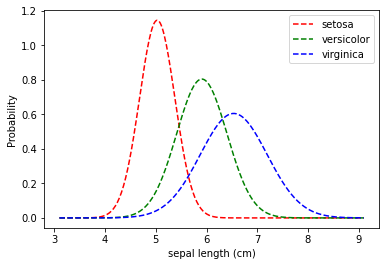

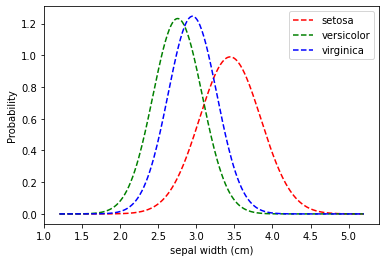

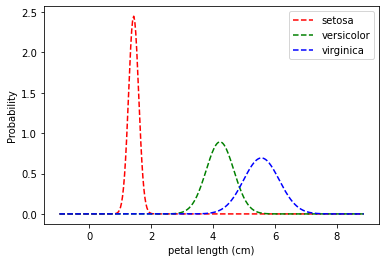

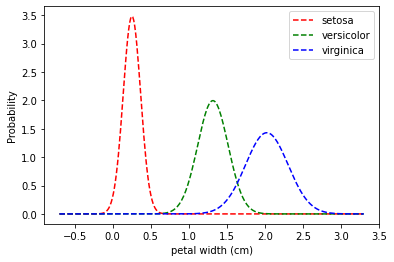

In [80]:

my_cols_dict = {0:'red', 1:'green', 2:'blue'}

for i in range(4):#4 features
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = x_max-x_min
    x_grid = np.linspace(x_min-x_range/3,x_max+x_range/3,300)
    fig, ax = plt.subplots()
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    for j in range(3):
      plt.plot(x_grid,st.norm.pdf(x_grid,centers[j,i],np.sqrt(variances[j,i])),'--',color=my_cols_dict[j])
    
    plt.legend(labels)    
    plt.show()    